# **MÓDULO 17 - Projeto de Credit Score**
## Parte 1 - Processamento dos dados**


O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O credit score tem como objetivo prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Ou seja, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

### Objetivo Geral
Organizar a base de dados para o desenvolvimento de modelo de previsão de Credit Score

#### Etapa 1
* Verificar tipos de dados
* Dimensionamento dadas colunas e existencia de dados
* Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento

Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from scipy.stats import shapiro, skew, kurtosis

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


### Etapa 1:
>**a)** Verificar e ajustar os tipos de dados conforme necessário.\
>**b)** Identificar e tratar valores ausentes com justificativa da abordagem.\
>**c)** Corrigir erros em variáveis categóricas para garantir a consistência dos dados.

#### **a)** Tipos de dados

Os tipos e dimensão dos dados são apresentados na **Tabela 1**. 
```python
print(df.info())
```

| # | Column              | Non-Null Count | Dtype   |
|---|---------------------|----------------|---------|
| 0 | Age                 | 130 non-null   | float64 |
| 1 | Gender              | 164 non-null   | object  |
| 2 | Income              | 164 non-null   | object  |
| 3 | Education           | 164 non-null   | object  |
| 4 | Marital Status      | 164 non-null   | object  |
| 5 | Number of Children  | 164 non-null   | int64   |
| 6 | Home Ownership      | 164 non-null   | object  |
| 7 | Credit Score        | 164 non-null   | object  |
**Tabela 1**
#### **b)** Valores Ausentes
Todas as colunas do conjunto de dados possuem 164 valores não nulos, com exceção da coluna **Age**, que contém 130 valores não nulos. Utilizando a função describe(), avaliamos suas estatísticas descritivas.A média (37.51) e a mediana (36) são valores relativamente próximos, sugerindo uma distribuição aproximadamente centralizada. No entanto, os valores mínimo (25) e máximo (53) não estão perfeitamente equilibrados em torno da média, o que pode indicar a presença de assimetria na distribuição. Além disso, a diferença entre os quartis (Q3 - Q1 = 15) reforça que os dados não seguem uma distribuição perfeitamente simétrica. Os dados não nulos representam 79% dos dados válidos. ou seja, 21% dos dados deveriam ser descartatos. Se optassemos por substituir esses pelos dados da média ou mediana, iria acrescentar uma véis muito forte(~20%). Então decidimos retirar uma amostra aleatória de 34 valores(21%) e substituir pelos dados ausentes. As linhas abaixo mostram o procedimento.  A **Tabela 2** resume a estatisca com essa abordagem.
```python
#atribuição de valores aleatórios em df['Age']
np.random.seed(31) #semente randomica
N_nan = df['Age'].isnull().sum() #total de elementos nulos
sample = np.random.choice(df['Age'].dropna(), size=N_nan, replace=False) # retirar valores aleatórios de df['Age']
df.loc[df['Age'].isnull(), 'Age'] = sample  # alocar sample no dataframe
```

| Estatística | Valor  | Novo Valor( add +34)  |
|-------------|--------|:---:|
| **Amostra (n)** | 130  |164|
| **Média (Mean)** | 37.51  |37.38|
| **Desvio Padrão (Std)** | 8.50   |8.56|
| **Mínimo (Min)** | 25.00  |25|
| **Mediana (Q2)** | 36.00  |36|
| **Máximo (Max)** | 53.00  |53|
| **1º Quartil (Q1)** | 30.00  |30|
| **3º Quartil (Q3)** | 45.00  |45|
| **Intervalo Interquartil (IQR = Q3 - Q1)** | 15.00  |15|
**Tabela 2**

#### **c)** Consistência das variaveis categoricas
Verificamos que todos os dados categoricos não apresentam erros de digitação ou redundancia de informação.Além disso as colunas *Gender*,*Marital Status*,*Home Ownership* possuem apenas 2 categorias, o que possibilita uma fácil mudança para numeros inteiros através da tecnica *Label Encoding*. A **Tabela 3** apresenta os dados categoricos de nossa base de dados. Por fim, observamos que os dados da coluna *Income*, estavam disponiveis com string, assim foi realizado a transformação para float.

| Feature          | Categories                                            | Total|
|-----------------|-------------------------------------------------------|-----
| Gender          | Female, Male                                         |2|
| Education       |High School Diploma, Associate's Degree, Bachelor's Degree, Master's Degree, Doctorate | 5|
| Marital Status  | Single, Married                                     |2|
| Home Ownership  | Rented, Owned                                       |2|
| Credit Score    | High, Average, Low                                  |3|
**Tabela 3**

In [3]:
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

#substituido
np.random.seed(312) #semente randomica
N_nan = df['Age'].isnull().sum() #total de elementos nulos
sample = np.random.choice(df['Age'].dropna(), size=N_nan, replace=False) # retirar valores aleatórios de df['Age']
df.loc[df['Age'].isnull(), 'Age'] = sample  # alocar sample no dataframe

#Transformando df['Income'] de string em float
df['Income'] = (
     df['Income']
     .str.replace('.', '', regex=False)  
     .str.replace(',', '.', regex=False)  
      .astype(float))

print(df.info())

print(df[['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']].apply(pd.Series.unique))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB
None
Gender                                               [Female, Male]
Education         [Bachelor's Degree, Master's Degree, Doctorate...
Marital Status                                    [Single, Married]
Home Ownership                                      [Rented, Owned]
Credit Score                                   [High, Average, Low

#### Etapa 2: Relize os passos que vimos no módulo 15, de análise.

>**a)** Realizar análise univariada das variáveis numéricas, utilizando estatísticas descritivas e gráficos para identificar a presença de outliers e extrair insights.\
>**b)** Analisar a distribuição das variáveis categóricas por meio de gráficos, interpretando padrões e tendências nos dados.\
>**c)** Identificar e tratar colunas com outliers, aplicando as correções necessárias.\
>**d)** Conduzir análise bivariada para investigar relações entre variáveis, respondendo a questões específicas sobre idade, status civil, score de crédito, escolaridade e impacto do salário.
>* Existe relação entre a idade e o status civil?
>* Qual a relação entre o score de crédito e o nível de escolaridade?
>* O salário parece influenciar na idade?
>* O salário parece influenciar no Score de Crédito?
>* Clientes com casa própria tendem a ter um score mais alto?
>  
>**e)** Explorar novas perguntas relevantes sobre os dados, elaborando e respondendo a pelo menos três questões adicionais com suporte gráfico e insights.

Em nosso conjunto de dados atuais, temos 3 grupos de dados:
* 1) 3 colunas numéricas: **Age**, **Income**, **Number of Children**
* 2) 5 colunas Categoricas: **Gender**, **Education**, **Marital Status**, **Home Ownership**,**Credit Score** 

#### **a)** Analise Univariada

Observamos que todas as 3 colunas, a priori, não apresentam um distribuição normal. Média e mediana não não são iguais, o que nós aponta para que os dados não seguem uma distribuição normal. A plotagem do boxplot(fig1) e das distribuições(fig2) somado ao além do teste Shapiro-wilk confirmaram este ponto. A **tabela 4** mostra a estatisca para esses valores.
 
| Estatística  | Age   | Income      | Number of Children |
|-------------|-------|------------|:--------------------:|
| **Count**   | 164   | 164        | 164                |
| **Média**   | 37.49 | 83,765.24  | 0.65               |
| **Desvio Padrão (Std)** | 8.56  | 32,457.31  | 0.88  |
| **Mínimo**  | 25.00 | 25,000.00  | 0.00               |
| **1º Quartil (Q1)** | 30.00 | 57,500.00  | 0.00  |
| **Mediana (Q2)** | 36.00 | 83,750.00  | 0.00  |
| **3º Quartil (Q3)** | 45.00 | 105,000.00 | 1.00  |
| **Máximo**  | 53.00 | 162,500.00 | 3.00  |
**tabela 4**

**Age**\
Observamos nos dados de idade  uma leve concentração para individuos mais jovens entre 25-35 anos(42.68%), para idades entre 35-45 esse valor cai para 31.7% e 25.6% para individuos mais velhos( 45-55 anos).

**Income**\
A maioria dos indivíduos está concentrada em faixas de renda intermediárias, especialmente entre 
55.000-105.000, que representa 53,66% da amostra. Isso sugere que a amostra é relativamente equilibrada em termos de renda, com uma concentração maior na classe média. Há poucos,9.76% da amostra, indivíduos nas faixas de renda mais baixas 25000 -45000. de forma semelhante há poucos indivíduos( 7 ou 4.27%) nas faixas de renda mais altas 145000-165000).

**Number of Children**\
Observamos uma predominâcia na amostra de indivíduos sem filhos 59%, contra 41% com filhos. Isso nos ajuda entender o fato da mediana ser zero. Indíviduos com 1 ou 2 filhos representam respetivamente 19,51 e 18,29, enquanto que 3 filhos é algo pontual, sendo 3% da amostra. 

In [58]:
df[['Age', 'Income', 'Number of Children']].describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.487805,83765.243902,0.652439
std,8.562644,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.000000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


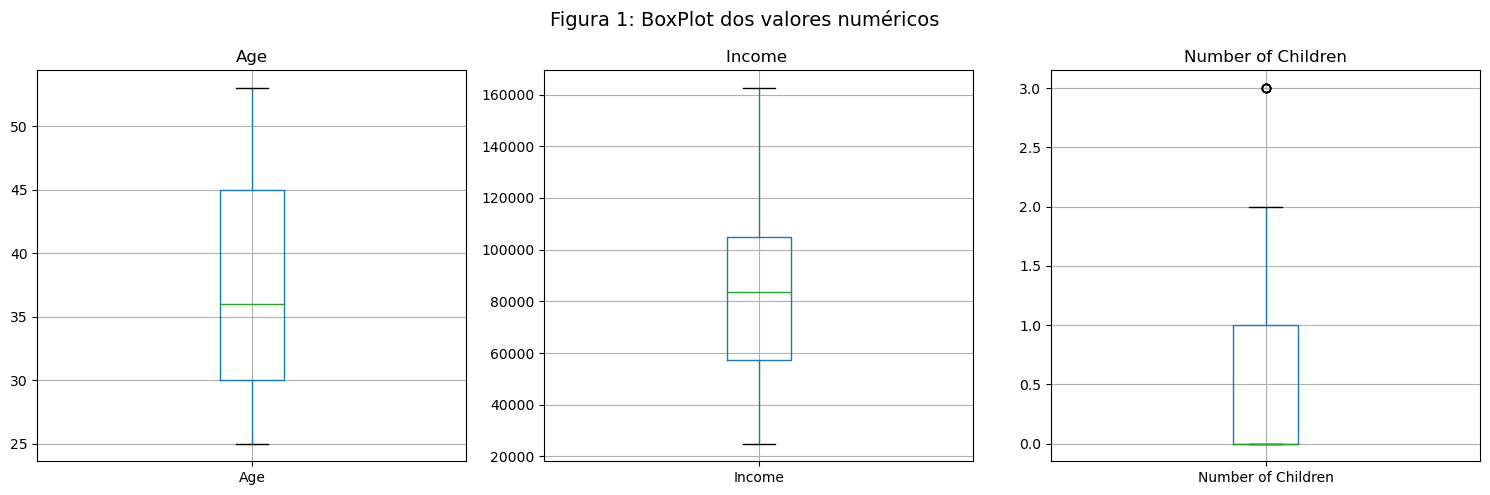

In [59]:
#Boxplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 linha, 3 colunas, tamanho da figura
fig.suptitle('Figura 1: BoxPlot dos valores numéricos', fontsize=14)

# Plotando os boxplots em cada subplot
df.boxplot(column='Age', ax=ax[0])
df.boxplot(column='Income', ax=ax[1])
df.boxplot(column='Number of Children', ax=ax[2])

#Títulos
ax[0].set_title('Age')
ax[1].set_title('Income ')
ax[2].set_title('Number of Children')

plt.tight_layout()
plt.show()

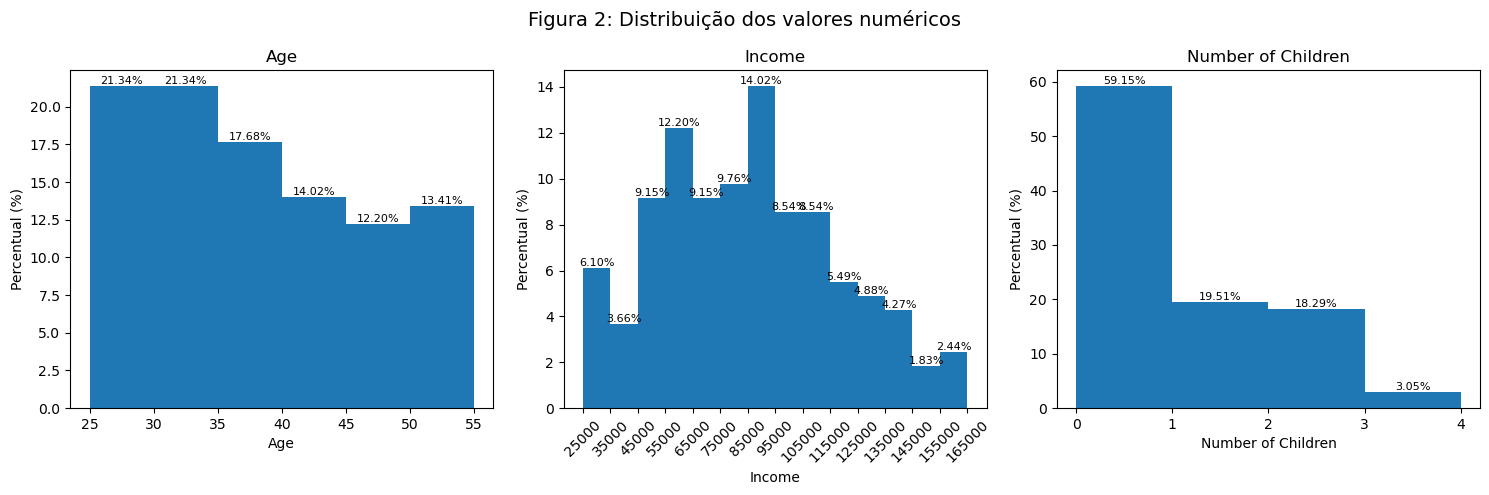

In [60]:
#histogramas
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
fig.suptitle('Figura 2: Distribuição dos valores numéricos', fontsize=14)

N=len(df)
temp1=df['Age']
bins1=np.arange(25,60,5)
c1, x1= np.histogram(temp1, bins1)
p1=c1/N*100

temp2=df['Income']
bins2=np.arange(25000,170000,10000)
c2, x2= np.histogram(temp2, bins2)
p2=c2/N*100

temp3=df['Number of Children']
bins3=np.arange(0,5,1)
c3, x3= np.histogram(temp3,bins3)
p3=c3/N*100


ax[0].bar(x1[0:-1], p1, width=np.diff(bins1), align='edge')  
ax[0].set_title('Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Percentual (%)')
ax[0].set_xticks(bins1)
for i in range(len(c1)):
        ax[0].text(x1[i]+2.5, p1[i] , f'{p1[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1].bar(x2[0:-1], p2, width=np.diff(bins2), align='edge')  
ax[1].set_title('Income')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Percentual (%)')
ax[1].set_xticks(bins2)
ax[1].set_xticklabels(bins2, rotation=45)

for i in range(len(c2)):
    ax[1].text(x2[i]+5000, p2[i] , f'{p2[i]:.2f}%', ha='center', va='bottom', fontsize=8)


ax[2].bar(x3[0:-1], p3, width=np.diff(bins3), align='edge')  
ax[2].set_title('Number of Children')
ax[2].set_xlabel('Number of Children')
ax[2].set_ylabel('Percentual (%)')
ax[2].set_xticks(bins3)
for i in range(len(c3)):
    ax[2].text(x3[i]+0.5, p3[i] , f'{p3[i]:.2f}%', ha='center', va='bottom', fontsize=8)    
plt.tight_layout()
plt.show()

df['Age Group'] = pd.cut(df['Age'], bins=bins1, right=False)
df['Income10k'] = pd.cut(df['Income'], bins=bins2, right=False)

#print(df['Age Group'].value_counts().sort_index())
#print(df['Income10k'].value_counts().sort_index())
#print(df['Number of Children'].value_counts().sort_index())

In [43]:
#teste de normalidade estatistico teste_shapiro
def teste_shapiro(dados):
    '''
    Hipótese nula (Ho): Os dados seguem uma distribuição normal.
    '''
    # Realiza o teste de Shapiro-Wilk
    shapiro_statistic, p_valor = shapiro(dados)
    
    # Calcula assimetria e curtose
    assimetria = skew(dados)
    curtose = kurtosis(dados)

    # Exibe os resultados
    print(f"Assimetria: {assimetria}")
    print(f"Curtose: {curtose}")
    print(f"Estatística de Shapiro-Wilk: {shapiro_statistic}")
    print(f"Valor p: {p_valor}")

    # Interpretação do resultado
    alpha = 0.05  # Nível de significância de 5%
    if p_valor < alpha:
        print("Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.")
    else:
        print("Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.")
    print('-' * 70)

# Exemplo de uso
# Suponha que `df` seja um DataFrame do Pandas com as colunas 'Age', 'Income' e 'Number of Children'
print('Teste de Shapiro-Wilk: Age')
teste_shapiro(df['Age'])

print('Teste de Shapiro-Wilk: Income')
teste_shapiro(df['Income'])

print('Teste de Shapiro-Wilk: Number of Children')
teste_shapiro(df['Number of Children'])

Teste de Shapiro-Wilk: Age
Assimetria: 0.2764935719174732
Curtose: -1.1697066711053983
Estatística de Shapiro-Wilk: 0.9380768274898872
Valor p: 1.488393475784961e-06
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------
Teste de Shapiro-Wilk: Income
Assimetria: 0.3087688297265483
Curtose: -0.5529380539212525
Estatística de Shapiro-Wilk: 0.9798087658479706
Valor p: 0.017001992385422177
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------
Teste de Shapiro-Wilk: Number of Children
Assimetria: 1.0044143525751978
Curtose: -0.2746661549473268
Estatística de Shapiro-Wilk: 0.7220960165146466
Valor p: 2.9353477658063935e-16
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------


#### **b)** Analisar a distribuição das variáveis categóricas

como a distribuição do estado cívil,onde há uma ligeira predominâcia das casada (53.05%), enquanto 46.95% são solteiras.
A maior parte das pessoas possui ensino superior(66.46%), com destaque para Bacharelado (25.61%), Mestrado (21.95%) e Doutorado (18.90%). Apenas 18.29% têm apenas o diploma do ensino médio e 15.24% tem curso tecnico (Associate's Degree). Essa distribuição sugere um grupo com nível educacional relativamente alto, o que pode sugestionar melhores salários.
67.68% das pessoas possuem casa própria, enquanto 32.32% vivem em imóveis alugados. Esse dado pode indicar um nível de estabilidade financeira relativamente alto na população analisada. Quando analisamos o Score, notamos que que a maioria dos indivíduos possui um score de crédito alto (68.90%), o que pode indicar um perfil financeiro saudável. Apenas 9.15% têm um score de crédito baixo, o que sugere poucos casos de alto risco financeiro na amostra. Os que possuem score médio (21.95%) podem estar em uma situação de transição entre bom e ruim. O resumo desses valos estão apresentados  na **tabela 5** assim como nos gráficos da **figura 3**.



| Categoria          | Opção                        | Proporção (%) |
|--------------------|-----------------------------|--------------|
| **Gender**        | Female                    | 52.44        |
|                   | Male                     | 47.56        |
| **Marital Status** | Married               | 53.05        |
|                   | Single                         | 46.95        |
| **Home Ownership** | Owned                     | 67.68        |
|                   | Rented                    | 32.32        |
| **Education**     | Bachelor's Degree        | 25.6       |
|                   | Master's Degree         | 21.95        |
|                   | Doctorate          | 18.90        |
|                   | High School Diploma               | 21.22        |
|                   | Associate's Degree               | 15.24        |
|**Credit Score**   | High                             |              |
|                   | Average               | 21.22        |
|                   | Low                 | 21.22        |
**tabela 5**.Resumo estatistico

A distribuição entre mulheres (52.44%) e homens (47.56%) é bastante equilibrada, com uma leve predominância feminina. Bem 



#### **c)** Identificar e tratar colunas com outliers.
Os dados estão dentro de faixas plausíveis a suas distribuições e não há indícios de erros ou valores impossíveis. Remover ou tratar outliers pode levar à perda de informações importantes. 

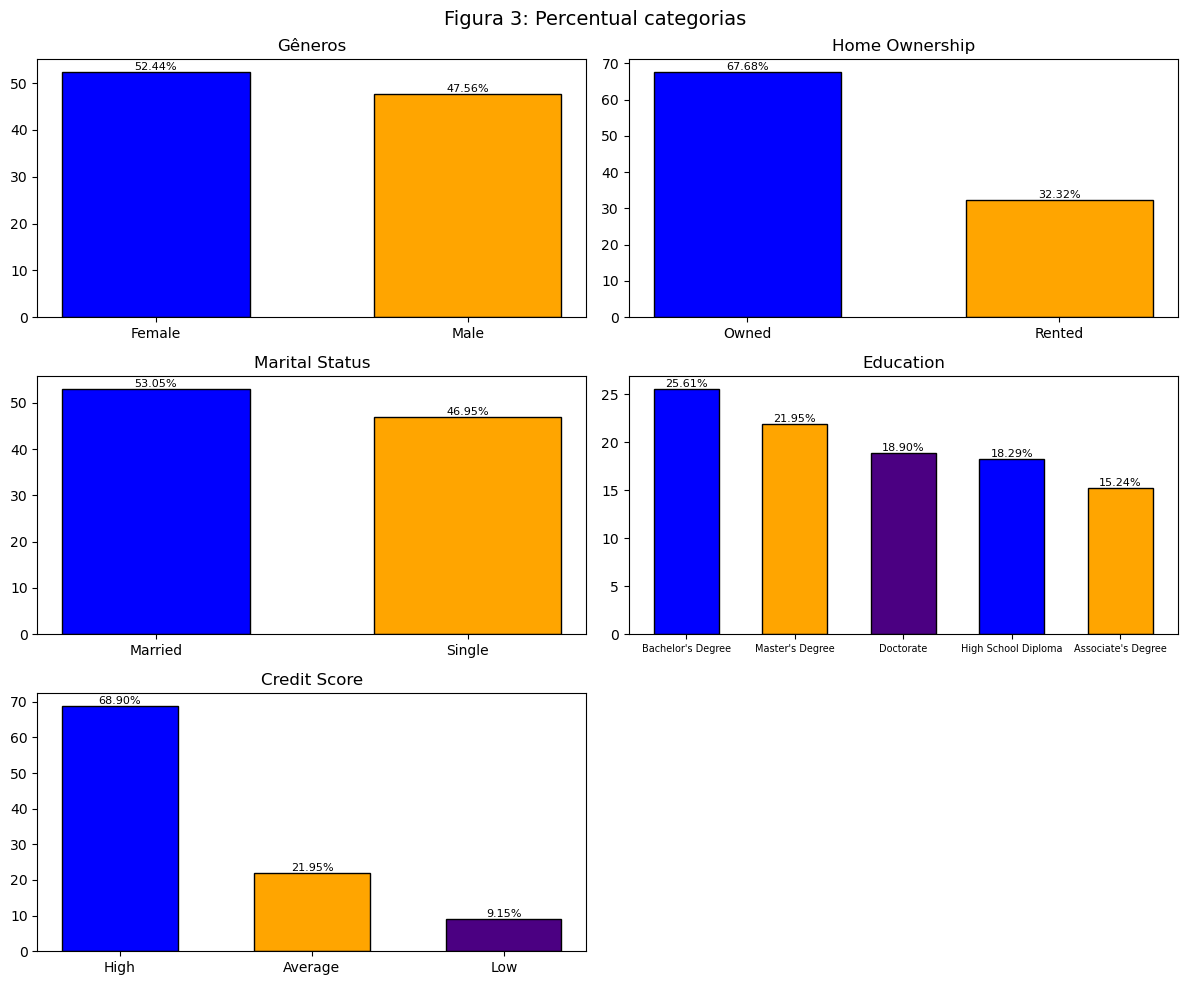

Gender
Female    52.439024
Male      47.560976
Name: proportion, dtype: float64
Education
Bachelor's Degree      25.609756
Master's Degree        21.951220
Doctorate              18.902439
High School Diploma    18.292683
Associate's Degree     15.243902
Name: proportion, dtype: float64
Marital Status
Married    53.04878
Single     46.95122
Name: proportion, dtype: float64
Home Ownership
Owned     67.682927
Rented    32.317073
Name: proportion, dtype: float64
Credit Score
High       68.902439
Average    21.951220
Low         9.146341
Name: proportion, dtype: float64


In [100]:
percentuala = df['Gender'].value_counts(normalize=True) * 100
percentualb = df['Education'].value_counts(normalize=True) * 100
percentualc = df['Marital Status'].value_counts(normalize=True) * 100
percentuald = df['Home Ownership'].value_counts(normalize=True) * 100
percentuale = df['Credit Score'].value_counts(normalize=True) * 100


fig, ax = plt.subplots(3, 2, figsize=(12, 10))  # 2 linhas, 2 colunas
fig.suptitle('Figura 3: Percentual categorias', fontsize=14)

# plot1: Gender
ax[0,0].bar(percentuala.index, percentuala.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[0,0].set_title('Gêneros')
for i in range(2):
    ax[0,0].text(i, percentuala.values[i] , f'{percentuala.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot2: Métodos de pagamento
ax[0,1].bar(percentuald.index, percentuald.values, color=['blue', 'orange','indigo','darkgreen'], edgecolor='black', width=0.6)
ax[0,1].set_title('Home Ownership')
ax[0, 1].set_xticks(percentuald.index)
ax[0, 1].set_xticklabels(percentuald.index)
for i in range(2):
    ax[0,1].text(i, percentuald.values[i] , f'{percentuald.values[i]:.2f}%', ha='center', va='bottom', fontsize=8) 
    
# plot3: Marital Status
ax[1,0].bar(percentualc.index, percentualc.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[1,0].set_title('Marital Status')
for i in range(2):
    ax[1,0].text(i, percentualc.values[i] , f'{percentualc.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
# plot4: Education
ax[1,1].bar(percentualb.index, percentualb.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[1,1].set_title('Education')
ax[1, 1].set_xticks(percentualb.index)
ax[1, 1].set_xticklabels(percentualb.index,fontsize=7)
for i in range(5):
    ax[1,1].text(i, percentualb.values[i] , f'{percentualb.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# plot5: Métodos de pagamento
ax[2,0].bar(percentuale.index, percentuale.values, color=['blue', 'orange','indigo','darkgreen'], edgecolor='black', width=0.6)
ax[2,0].set_title('Credit Score')
#ax[2,0].set_xticklabels(percentuale.index)
for i in range(3):
    ax[2,0].text(i, percentuale.values[i] , f'{percentuale.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    
ax[2][1].set_visible(False)
plt.tight_layout()
plt.show()
print(percentuala) 
print(percentualb) 
print(percentualc) 
print(percentuald) 
print(percentuale)

#### **d)** Análise bivariada

**d1)** idade x status civil?\
**d2)** score de créditox nível de escolaridade?\
**d3)** O salário x idade?\
**d4)** O salário xScore de Crédito?\
**d5)** Clientes com casa própria tendem a ter um score mais alto?\

/tmp/ipykernel_76136/621613290.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped1 = df.groupby(['Marital Status', 'Age Group']).size().reset_index(name='count')
/tmp/ipykernel_76136/621613290.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_Age = df_grouped1.groupby('Age Group')['count'].transform('sum')
/home/akel/anaconda3/envs/plottools/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

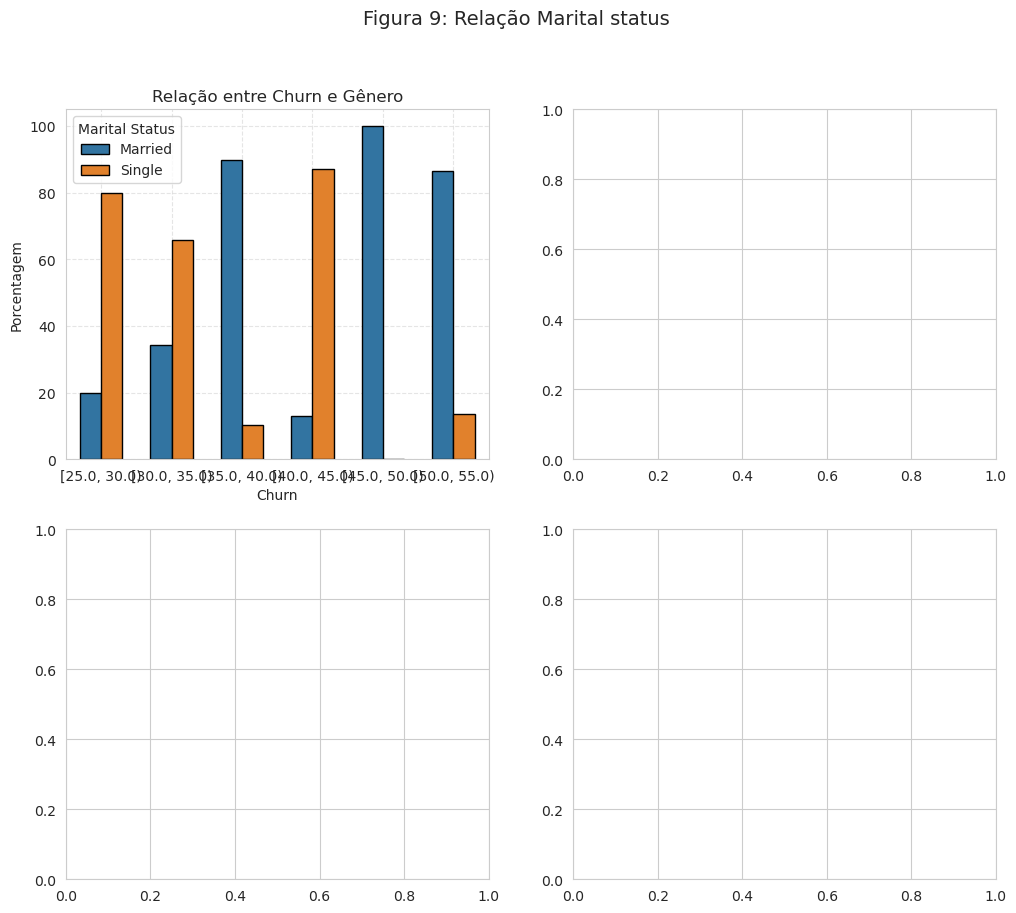

In [108]:
# 1. Agrupar idades em intervalos de 5 anos
intervalos = np.arange(df['Age'].min(), df['Age'].max() + 6, 5)  # +6 para garantir que o último intervalo seja incluído
df['Age Group'] = pd.cut(df['Age'], bins=intervalos, right=False)  # right=False para incluir o limite inferior

# 2. Agrupar por 'Marital Status' e 'Age Group' e calcular a contagem
df_grouped1 = df.groupby(['Marital Status', 'Age Group']).size().reset_index(name='count')

# 3. Calcular o total por grupo de idade
total_por_Age = df_grouped1.groupby('Age Group')['count'].transform('sum')

# 4. Calcular a porcentagem de cada grupo em relação ao total da faixa etária
df_grouped1['percent'] = (df_grouped1['count'] / total_por_Age) * 100

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Figura 9: Relação Marital status', fontsize=14)
sns.set_style("whitegrid") 

# plot1: Churn x Gênero
sns.barplot(data=df_grouped1, x='Age Group', y='percent', hue='Marital Status',
            edgecolor='black', width=0.6,ax=ax[0, 0])
ax[0, 0].set_title('Relação entre Churn e Gênero')
ax[0, 0].set_xlabel('Churn')
ax[0, 0].set_ylabel('Porcentagem')
ax[0, 0].grid(True, linestyle='--', alpha=0.5)